People's decisions depend on the way probability is expressed to them

[*********************100%***********************]  1 of 1 completed


/var/folders/n9/bmmyc8hd0x505y9fd0hm1mc40000gn/T/ipykernel_56634/3369545920.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tesla returns: 1.94% of data is beyond 3 standard deviations


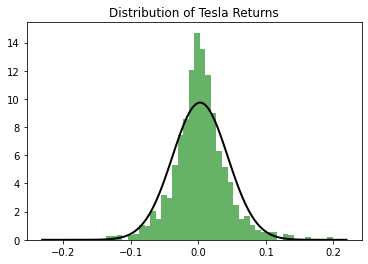

In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Download historical data for Tesla stock
data = yf.download('TSLA','2018-01-01','2023-07-21')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Remove NA values
data = data.dropna()

# Calculate the standard deviation and mean
std_dev = data['Return'].std()
mean = data['Return'].mean()

# Calculate the number of standard deviations each return is from the mean
data['Return Z-Scores'] = (data['Return'] - mean) / std_dev

# Count the number of returns beyond 3 standard deviations
num_beyond_3sd = len(data[np.abs(data['Return Z-Scores']) > 3])

# Get the total number of returns
total_num = len(data['Return'])

# Calculate the percentage of returns beyond 3 standard deviations
percentage_beyond_3sd = num_beyond_3sd / total_num * 100

print(f'Tesla returns: {percentage_beyond_3sd:.2f}% of data is beyond 3 standard deviations')

# Plot the distribution of returns
plt.hist(data['Return'], bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Tesla Returns')
plt.show()


In [21]:
from scipy.stats import norm
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pymc3 as pm

# Download historical data for Tesla stock
data = yf.download('TSLA','2019-01-01','2023-07-11')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Remove NA values
data = data.dropna()

# # Calculate the standard deviation and mean
# std_dev = data['Return'].std()
# mean = data['Return'].mean()

# Calculate mean and standard deviation of returns
mu = np.mean(data['Return'])
sigma = np.std(data['Return'])

# Calculate the number of standard deviations each return is from the mean
data['Return Z-Scores'] = (data['Return'] - mean) / std_dev

# Count the number of returns beyond 3 standard deviations
num_beyond_3sd = len(data[np.abs(data['Return Z-Scores']) > 3])

# Get the total number of returns
total_num = len(data['Return'])

# Calculate the percentage of returns beyond 3 standard deviations
percentage_beyond_3sd = num_beyond_3sd / total_num * 100

print(f'Tesla returns: {percentage_beyond_3sd:.2f}% of data is beyond 3 standard deviations')

[*********************100%***********************]  1 of 1 completed
Tesla returns: 1.67% of data is beyond 3 standard deviations


/var/folders/n9/bmmyc8hd0x505y9fd0hm1mc40000gn/T/ipykernel_56634/3806392938.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The Student's t-distribution is a family of probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It has a parameter called degrees of freedom, typically denoted by ν (nu) or df, which is related to the sample size. It refers to the number of independent pieces of information available to estimate parameters of a population from a sample. 

For a simple sample from a normal distribution, the degrees of freedom would be the sample size minus 1 (i.e., if you have a sample of size n, then df = n - 1). This is because you've used up one "degree of freedom" to calculate the sample mean.

Degrees of freedom are crucial to the shape of the t-distribution. As the degrees of freedom increase, the t-distribution becomes more like a standard normal distribution. When you have a large sample size (and thus many degrees of freedom), the extra uncertainty from estimating the population standard deviation becomes negligible, and the t-distribution converges to a normal distribution. But with fewer degrees of freedom (smaller sample size), the t-distribution has heavier tails than the normal distribution, reflecting the greater uncertainty.

Raphael: Whatever hedging, insuring, protection, risk management policy, do not rely on a model you have selected, then estimated, but perform thorough pseudo-random (Monte-Carlo) simulations that includes these fluctuations and model changes. Now comes the interesting part: start with a thin-tailed model, say, result of CLT (central limit theorem), Brownian, Gaussian... Then make parameters fluctuate and model change with some random occurrence. Then repeat the process: make fluctuation parameters themselves fluctuate, and the model change itself change, etc. What you get in the end is exactly a Pareto distribution. The tail parameter of which depends on size of repeated fluctuations and model changes. But the bottom line is the systematicity of reaching a Pareto distribution and a fractal structure. This is why, in real life, we always observe fractal structures, self similarity and Pareto distribution. This is an extremely robust pattern.

In [20]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=10)
    sd = pm.HalfNormal('sd', sd=10)
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=data['Return'])

    trace = pm.sample(2000, tune=2000, chains=1)

# Calculate the mean and standard deviation of the sampled parameter values
mu_posterior_mean = np.mean(trace['mu'])
sd_posterior_mean = np.mean(trace['sd'])

# # Generate probability density function
# pdf = pm.plot_posterior_predictive_glm(trace, samples=1000, eval=np.linspace(data['Return'].min(), data['Return'].max(), 100), lm=lambda x, sample: sample['mu'] + sample['sd']*x)

from scipy.stats import t
# Calculate degrees of freedom for t-distribution (arbitrarily chosen, you may want to fit this parameter)
df = 3
# Generate t-distribution with the same mean and scale as the data
pdf_t = t.pdf(x, df, mu_posterior_mean, sd_posterior_mean)

A "fat tail" in statistics refers to the tails of a probability distribution that decay more slowly than an exponential decay, which is the case in normal (or Gaussian) distributions. In other words,  extreme events (those far from the mean or median) are more likely in a fat-tailed distribution than in a thin-tailed one.

A power law distribution is a specific type of fat-tailed distribution. It follows the form:

$P(x)\~x^(-alpha)$

where P(x) is the probability of an event of size x, alpha is a constant (often > 1), and '~' indicates 'is proportional to.' An important feature of power law distributions is that they are scale invariant, meaning that the shape of the distribution remains the same, irrespective of the scale at which it is viewed.

In the context of finance this is important because fat-tailed distributions and power laws often more accurately describe real-world phenomena (like fluctuations in stock prices) than thin-tailed distributions like the normal distribution. They capture the higher likelihood of extreme events or "black swans," which can have major impacts on markets and economies.

In [30]:
# Generate normal distribution with the posterior mean and standard deviation
x = np.linspace(mu_posterior_mean - 3*sd_posterior_mean, mu_posterior_mean + 3*sd_posterior_mean, 100)
x_minmax = np.linspace(data['Return'].min(), data['Return'].max(), 100)

pdf_norm = norm.pdf(x_minmax, mu_posterior_mean, sd_posterior_mean)

from scipy.stats import t

# Estimate parameters for t-distribution
df, loc, scale = t.fit(data['Return'])

# Generate t-distribution
x_t = np.linspace(t.ppf(0.01, df, loc, scale), t.ppf(0.99, df, loc, scale), 100)
pdf_t = t.pdf(x_minmax, df, loc, scale)

# Create histogram (this will be displayed on the left y-axis)
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Return'], histnorm='probability', nbinsx=50, name='Histogram of Returns', yaxis='y1'))

# Create normal distribution (this will be displayed on the right y-axis)
fig.add_trace(go.Scatter(x=x, y=pdf_norm, mode='lines', name='Normal Distribution', yaxis='y2'))
fig.add_trace(go.Scatter(x=x_minmax, y=pdf_t, mode='lines', name='T-Distribution', yaxis='y2'))

# Update layout
fig.update_layout(
    title_text='Distribution of Tesla Returns',
    xaxis_title_text='Return',
    yaxis=dict(
        title_text='Density (Histogram)',
        side='left',
        titlefont=dict(
            color='blue'
        ),
        tickfont=dict(
            color='blue'
        )
    ),
    yaxis2=dict(
        title_text='Density (PDF)',
        side='right',
        overlaying='y',
#         titlefont=dict(
#             color='red'
#         ),
#         tickfont=dict(
#             color='red'
#         )
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=False,
    width=1000,
    height=800,
)

fig.show()


If we're to model the element of "surprise" in a stock price movement, such as that of TSLA, we could look at it through the lens of outliers in a fat-tail domain. We would essentially be quantifying how much a particular price movement deviates from what we would expect under normal circumstances.

For instance, consider that TSLA's daily returns follow a fat-tailed distribution. Under this distribution, most days will see relatively small price changes, but occasionally, there will be very large changes -- these are the "fat tails".

One way to quantify the "surprise" of a price movement is by calculating how many standard deviations away from the mean it is, a measure often referred to as a "z-score". Under a normal distribution, a z-score of 3 or more is considered very rare (occurring less than 0.3% of the time), but under a fat-tailed distribution, such occurrences are more common.

Let's say, for example, the average daily return of TSLA is 0.2% with a standard deviation of 2%. If TSLA one day has a return of 10%, we can calculate the z-score as follows:

$z = (10\% - 0.2\%) / 2\% = 4.9$

This suggests the move is 4.9 standard deviations away from the mean, a huge "surprise" under normal distribution assumptions, but in a fat-tailed world, such moves can happen more often than we would normally expect.

However, it's worth mentioning that a z-score can be misleading in fat-tail domains due to the unstable nature of the standard deviation. A more robust measure in fat-tail domains could be the use of quantiles or percentiles (like Value-at-Risk or Conditional Value-at-Risk) which better capture the likelihood of extreme events.

Another approach would be to measure the Mean Absolute Deviation (MAD) from the median instead of standard deviation from the mean, as it is less sensitive to extreme values. This fits well with Taleb's rule: "Mean Average Deviation/Mean Absolute Deviation is better than Standard Deviation".

Also, always remember that quantifying "surprise" this way is a simplification. Markets are complex systems influenced by countless factors, many of which cannot be accurately captured by any statistical model. Always combine statistical models with fundamental analysis and critical thinking.

In [29]:
from scipy.stats import norm, t
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pymc3 as pm

# Download historical data for Tesla stock
data = yf.download('TSLA','2019-01-01','2023-07-11')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Remove NA values
data = data.dropna()

# Calculate mean and standard deviation of returns
mu = np.mean(data['Return'])
sigma = np.std(data['Return'])

# Calculate MAD
mad = np.mean(np.abs(data['Return'] - mu))

# Generate normal distribution with the posterior mean and standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# x = np.linspace(mu_posterior_mean - 3*sd_posterior_mean, mu_posterior_mean + 3*sd_posterior_mean, 100)
x_minmax = np.linspace(data['Return'].min(), data['Return'].max(), 100)

# pdf_norm = norm.pdf(x_minmax, mu_posterior_mean, sd_posterior_mean)
pdf_norm = norm.pdf(x, mu, sigma)

from scipy.stats import t

# Estimate parameters for t-distribution
# df, loc, scale = t.fit(data['Return'])
# Create Student's t distribution
df = 3  # degrees of freedom
rv = t(df)

# Generate t-distribution
# x_t = np.linspace(t.ppf(0.01, df, loc, scale), t.ppf(0.99, df, loc, scale), 100)
pdf_t = t.pdf(x_minmax, df, loc, scale)
pdf_t = rv.pdf((x-mu)/sigma) / sigma

# Create histogram (this will be displayed on the left y-axis)
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Return'], histnorm='probability',  #'probability density'
                           nbinsx=50, name='Histogram of Returns', yaxis='y1'))

# Create normal distribution (this will be displayed on the right y-axis)
fig.add_trace(go.Scatter(x=x, y=pdf_norm, mode='lines', name='Normal Distribution', yaxis='y2'))
fig.add_trace(go.Scatter(x=x_minmax, y=pdf_t, mode='lines', name='T-Distribution', yaxis='y2'))

# Add SD and MAD lines
fig.add_shape(type="line", x0=mu+sigma, y0=0, x1=mu+sigma, y1=1, line=dict(color="Red",width=2), name='+1 SD')
fig.add_shape(type="line", x0=mu-sigma, y0=0, x1=mu-sigma, y1=1, line=dict(color="Red",width=2), name='-1 SD')
fig.add_shape(type="line", x0=mu+mad, y0=0, x1=mu+mad, y1=1, line=dict(color="Blue",width=2), name='+1 MAD')
fig.add_shape(type="line", x0=mu-mad, y0=0, x1=mu-mad, y1=1, line=dict(color="Blue",width=2), name='-1 MAD')

# Update layout
fig.update_layout(
    title_text='Distribution of Tesla Returns',
    xaxis_title_text='Return',
    
#     yaxis=dict(
#         title_text='Density (Histogram)',
#         side='left', titlefont=dict(color='blue'),
#         tickfont=dict(color='blue')
#     ),
#     yaxis2=dict(
#         title_text='Density (PDF)',
#         side='right', overlaying='y',
#     ),
    
    yaxis=dict(title='Density (PDF)', side='left', range=[0, max(pdf_norm.max(), pdf_t.max())]),
    yaxis2=dict(title='Frequency', side='right', overlaying='y', showgrid=False, range=[0, 1]),
    
    bargap=0.2,
    bargroupgap=0.1,
    autosize=False,
    width=1000,
    height=800,
)

fig.show()


[*********************100%***********************]  1 of 1 completed


In [11]:
print(data['Return'])

Date
2019-01-03   -0.031472
2019-01-04    0.057697
2019-01-07    0.054361
2019-01-08    0.001164
2019-01-09    0.009483
                ...   
2023-07-03    0.068954
2023-07-05    0.009506
2023-07-06   -0.021028
2023-07-07   -0.007630
2023-07-10   -0.017564
Name: Return, Length: 1136, dtype: float64


In [13]:
data['Return'].describe()

count    1136.000000
mean        0.003134
std         0.041738
min        -0.210628
25%        -0.017568
50%         0.002453
75%         0.023615
max         0.198949
Name: Return, dtype: float64

In [103]:
data.index.min

<bound method Index.min of DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-16', '2018-01-17',
               ...
               '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14', '2023-07-17', '2023-07-18',
               '2023-07-19', '2023-07-20'],
              dtype='datetime64[ns]', name='Date', length=1395, freq=None)>

In [102]:
df=data.copy()

In [91]:
# Set 'Date' as the index of the DataFrame
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [95]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Return Z-Scores', 'Cumulative Returns'],
      dtype='object')

In [93]:
# Calculate the cumulative returns
df['Cumulative Returns'] = (1 + df['Return']).cumprod()

In [94]:
# # Filter the last 5 years
# start_date = df.index.max() - pd.DateOffset(years=5)
# df_last_5_years = df.loc[start_date:]

In [92]:
# Plot the cumulative returns
df['Cumulative Returns'].plot(figsize=(10, 5))

# Show the plot
plt.title('Tesla 5-Year Returns')
plt.ylabel('Cumulative Returns')
plt.show()

KeyError: 'Cumulative Returns'

In [104]:
# Create histogram (this will be displayed on the left y-axis)
fig = go.Figure()

# Create normal distribution (this will be displayed on the right y-axis)
fig.add_trace(go.Scatter(x=df_last_5_years.index, y=df_last_5_years['Cumulative Returns'], mode='lines', name='Cumulative'))
# fig.add_trace(go.Scatter(x=df_last_5_years.index, y=df_last_5_years['Adj Close'], name='Price', yaxis='y2'))

# Update layout
fig.update_layout(
#     title_text='Distribution of Tesla Returns',
#     xaxis_title_text='Return',
    yaxis=dict(
#         title_text='Density (Histogram)',
        side='left',
        titlefont=dict(
            color='blue'
        ),
        tickfont=dict(
            color='blue'
        )
    ),
    yaxis2=dict(
#         title_text='Density (PDF)',
        side='right',
        overlaying='y'))

In [63]:
df_last_5_years['Cumulative Returns']

Date
2019-01-03     0.968528
2019-01-04     1.024410
2019-01-07     1.080098
2019-01-08     1.081356
2019-01-09     1.091610
                ...    
2023-07-03    13.534438
2023-07-05    13.663098
2023-07-06    13.375790
2023-07-07    13.273732
2023-07-10    13.040596
Name: Cumulative Returns, Length: 1136, dtype: float64

In [116]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you have already fetched TSLA stock data in a DataFrame named `tsla_df`
# Ensure 'Date' is a datetime object and set it as the index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Calculate the returns
# df['Returns'] = df['Close'].pct_change()

# Create a Scatter plot for the returns
trace = go.Scatter(
    x=df.index, 
    y=df['Close'], 
    mode='lines',
    name='Returns'
)

# Create the list of events
events = [
    {'date': '2018-08-06', 'event': "Musk's 'funding secured' tweet"},
    {'date': '2019-11-21', 'event': 'Cybertruck Reveal'},
    {'date': '2020-07-22', 'event': 'Q2 2020 Earnings Report'},
    {'date': '2020-08-31', 'event': '5-for-1 stock split'},
    {'date': '2020-12-21', 'event': 'Inclusion in the S&P 500'},
    {'date': '2023-07-19', 'event': "23' Q2 Earnings"},
    {'date': '2023-04-19', 'event': "23' Q1 Earnings"},
    {'date': '2023-01-25', 'event': "22' Q4 Earnings"},
    {'date': '2022-10-19', 'event': "22' Q3 Earnings"},
    {'date': '2022-07-20', 'event': "22' Q2 Earnings"},
    {'date': '2022-04-20', 'event': "22' Q1 Earnings"},
    {'date': '2022-01-26', 'event': "21' Q4 Earnings"},
    {'date': '2021-10-20', 'event': "21' Q3 Earnings"},
    {'date': '2021-07-26', 'event': "21' Q2 Earnings"},
    {'date': '2021-04-21', 'event': "21' Q1 Earnings"},
    
]

# Add the annotations
annotations = []
for event in events:
    annotations.append(
        go.layout.Annotation(
            x=event['date'],
            y=df.loc[event['date'], 'Close'], # The return on the event date
            xref="x",
            yref="y",
            text=event['event'],
            showarrow=True,
            arrowhead=1,
#             height=0.1,
            ax=-10,
            ay=-70
        )
    )

# Create the layout
layout = go.Layout(
    title='Tesla 5-Year Returns with Key Events',
    annotations=annotations,
#     yaxis=dict(title='Returns'),
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()


Surprise can be measured as the difference between the earnings expectations (Gaussian), and actual earnings (nonlinear, based on a variety of factors including changes in market conditions, the company's strategic decisions, and unforeseen events). 

Analysts' expectations are usually reflected in the form of earnings estimates, which are frequently collected and reported by a number of financial information and news services. These include:

- Earnings Forecasts: These are typically expressed as an estimate of Earnings Per Share (EPS) for a given quarter or year. The EPS estimate represents the analysts' average expectation of a company's profitability.

- Revenue Estimates: Analysts also provide estimates for a company's revenue for a given period. This helps investors understand the expected top-line growth of the company.

- Other Financial Metrics: Depending on the company and industry, analysts may also provide estimates for other key financial metrics, such as gross margin, operating margin, EBITDA, and more.


The concept of "priced in" refers to the extent to which market expectations, including all publicly available information, are already reflected in the current price of a security. Some of the factors that might be "priced in":

- Publicly Available Information: This includes financial reports, news releases, and any other information that's publicly available and pertinent to the value of the asset.

- Market Sentiment: This is the overall attitude of investors towards a particular security or financial market. It is the cumulative attitude of all market participants towards risk, and it can heavily influence whether potential news or events are already priced in.

- Analyst Estimates: If analysts have widely shared an expectation for a company’s future performance, this expectation may be priced in.

- Economic Indicators: Things like GDP reports, unemployment rates, and consumer sentiment indices can all impact what's priced into the market.

In [100]:
df.index

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-16', '2018-01-17',
               ...
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10'],
              dtype='datetime64[ns]', name='Date', length=1387, freq=None)

In [87]:
df.loc['2018-08-08', 'Returns']

KeyError: '2018-08-08'